<a href="https://colab.research.google.com/github/HiImGabry/speech-recognition-representation-unica-dl/blob/issue-2/Analisi_Esplorativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Analisi Dataset*

In [24]:
#importo le librerie necessarie
import tensorflow as tf
import pathlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as IPD
from google.colab import drive #libreria particolare per avere la possibilità di accedere al mio Drive da Colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#tramite comandi per il terminale mi muovo all'interno del MIO personale drive(il path specificato potrebbe cambiare per voi)
!cd /content/drive/MyDrive/Colab\ Notebooks/reduced_dataset/train
!ls

drive  sample_data


In [3]:
#qui abbiamo un primo esempio di cosa è contenuto in una delle nostre cartelle
!ls /content/drive/MyDrive/Colab\ Notebooks/reduced_dataset/train/audio/wow

0132a06d_nohash_0.wav  3d6bee47_nohash_1.wav  72aa7259_nohash_1.wav  b26343e9_nohash_0.wav
01648c51_nohash_1.wav  3d9200b9_nohash_0.wav  7318280c_nohash_1.wav  b26343e9_nohash_1.wav
016e2c6d_nohash_0.wav  3da7f617_nohash_0.wav  73af0c50_nohash_0.wav  b3bb4dd6_nohash_0.wav
01bb6a2a_nohash_0.wav  3df9a3d4_nohash_0.wav  742d6431_nohash_0.wav  b4aa9fef_nohash_0.wav
05cf43ef_nohash_1.wav  3ea77ede_nohash_0.wav  745a8e32_nohash_0.wav  b5552931_nohash_0.wav
070b49af_nohash_0.wav  413bcfe1_nohash_0.wav  76424fa5_nohash_0.wav  b7669804_nohash_0.wav
079d1020_nohash_0.wav  41dce6f5_nohash_1.wav  78622c2b_nohash_0.wav  b83c1acf_nohash_0.wav
079dfce3_nohash_0.wav  421ed23f_nohash_0.wav  7ab5b8f7_nohash_0.wav  b8872c20_nohash_0.wav
07c5129e_nohash_0.wav  422d3197_nohash_1.wav  7add4c5f_nohash_1.wav  b9515bf3_nohash_0.wav
095847e4_nohash_1.wav  422f8cf1_nohash_1.wav  7bf801d1_nohash_0.wav  b959cd0c_nohash_0.wav
099d52ad_nohash_0.wav  437455be_nohash_0.wav  7ca023e2_nohash_3.wav  bb31b82b_nohash_1.wav

In [13]:
path_dataset = '/content/drive/MyDrive/Colab Notebooks/reduced_dataset/train/audio'

data_dir = pathlib.Path(path_dataset)
labels = np.array(tf.io.gfile.listdir(str(data_dir)))
labels = labels[labels != '.DS_Store'] #rimuovo .DS_Store perché non è un comando, devo chiedere a Gabry cosa sia
print('Labels che troviamo nelle varie cartelle: ', labels)

Labels che troviamo nelle varie cartelle:  ['house' 'yes' 'down' 'five' 'on' 'two' 'off' 'four' 'six' 'marvin' 'up'
 'seven' 'bird' 'nine' 'one' 'sheila' 'left' 'zero' 'stop' 'three' 'wow'
 'no' 'bed' 'go' 'eight' 'cat' 'happy' 'tree' 'dog' 'right']


In [18]:
#passiamo ora a vedere da quanti file è composto il nostro dataset di train
num_audio_train = tf.io.gfile.glob(str(data_dir) + '/*/*')
num_audio_train = tf.random.shuffle(num_audio_train)

print('Numero totale di file audio: ', len(num_audio_train))


number_audio_for_label = len(tf.io.gfile.listdir(str(data_dir/labels[0])))
print("Il numero di file audio per ogni singola label è:", number_audio_for_label)

Numero totale di file audio:  9000
Il numero di file audio per ogni singola label è: 300


In [4]:
#proviamo ad ascoltare un audio e capiamo come farlo sopratutto
path_audio = '/content/drive/MyDrive/Colab Notebooks/reduced_dataset/train/audio/wow/aac5b7c1_nohash_0.wav'
audio = IPD.Audio(path_audio, autoplay=True)
display(audio)


In [32]:
def decode_audio(audio_binary):
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  return tf.squeeze(audio, axis = -1)

def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep
  )
  return parts[-2]

def get_wave_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  wave = decode_audio(audio_binary)
  return wave, label

In [33]:
AUTOTUNE = tf.data.AUTOTUNE
files_ds = tf.data.Dataset.from_tensor_slices(num_audio_train)

wave_ds = files_ds.map(
    map_func=get_wave_and_label,
    num_parallel_calls=AUTOTUNE
)

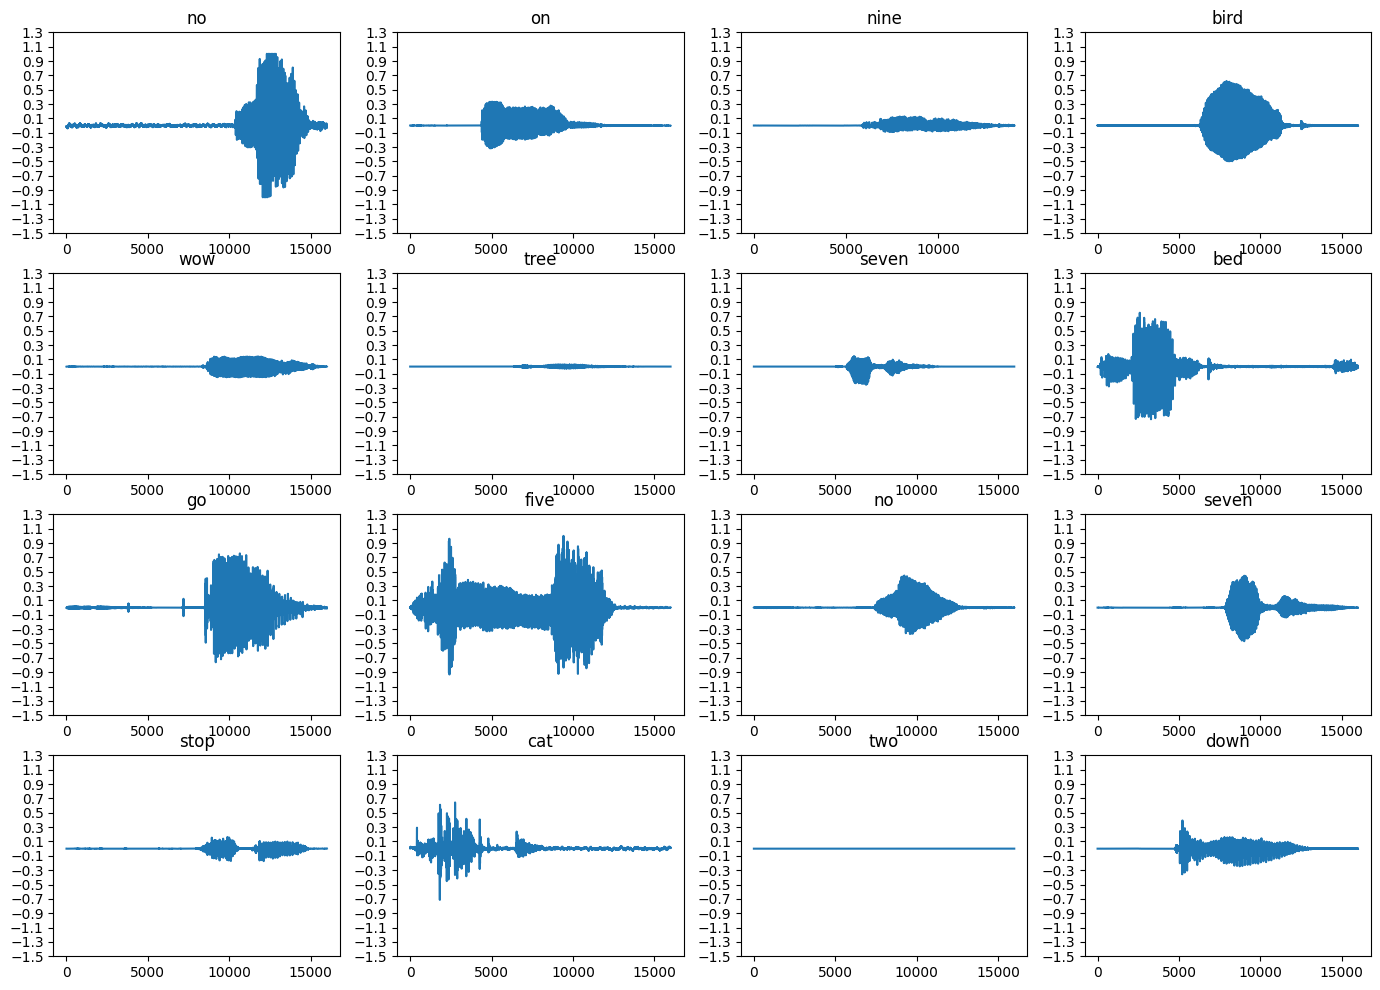

In [48]:
#codice preso dalla documentazione ufficiale di TensorFlow, raga scusate ma non sapevo fare i grafici
#anyway, qui estraiamo dei campioni di audio e vediamo alcune delle forme di onde degli audio
rows = 4
cols = 4

n = rows * cols

fig,axes = plt.subplots(rows, cols, figsize=(17,12))


for i, (audio, label) in enumerate (wave_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.5, 1.5, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()